# OSS Insight + CHAOSS Metrics Analysis Notebook

This notebook provides a full tutorial and report on how to:

- Query the OSS Insight API for GitHub repositories  
- Transform those JSON API responses into pandas DataFrames  
- Map each retrieved metric to its corresponding **CHAOSS community health metrics**  
- Produce **interactive visualizations** using Bokeh  
- Understand what each visualization means in terms of project health  
- Apply all steps to a chosen repository: **deeplabcut/deeplabcut**

The goal is to replicate what tools like **GrimoireLab**, **Augur**, or **GHViz** provide,
but directly inside a Python notebook, using OSS Insight as the data source.

By the end of this report, you will have:
- A reusable workflow  
- A complete visualization dashboard  
- A blueprint to build your own open-source analytics system 

In [7]:
import rdflib
import pandas as pd
import tentris 
from tentris import TentrisHTTPStore
import urllib.error
from IPython.display import display, Markdown
import os
from dotenv import load_dotenv
import requests
from pathlib import Path

load_dotenv()

#Configuration
ENDPOINT_URL = "http://128.178.219.51:7502"

if os.path.isdir(Path("/secrets")):
    display("Using Renku secrets to configure Tentris.")
    secrets_dir = Path("/secrets")
    USER = (secrets_dir / "tentris_user").read_text()
    PASS = (secrets_dir / "tentris_password").read_text()
else: 
    display("Using local env file to configure Tentris.")
    USER = os.getenv("TENTRIS_USER") 
    PASS = os.getenv("TENTRIS_PASSWORD")


if USER and PASS:
    display(Markdown("✅ Environment loaded successfully."))
else:
    display(Markdown("⚠️ Could not find any user and password for Tentris. check your secrets or .env file."))

def login(url: str, user: str, password: str) -> str:
    s = requests.Session()
    s.post(f"{url}/login", {"username": user, "password": password})
    c = s.cookies.get("tentris")
    
    return f"tentris={c}"

graph = None

# --- Connect to Tentris Server ---

def login(url: str, user: str, password: str) -> str:
    s = requests.Session()
    resp = s.post(f"{url}/login", {"username": user, "password": password})
    resp.raise_for_status()
    cookie = s.cookies.get("tentris")
    return f"tentris={cookie}"

display(Markdown(f"🚀 Connecting to `{ENDPOINT_URL}`..."))

cookie = login(ENDPOINT_URL, USER, PASS)
display(Markdown(f"✅ Logged in as `{USER}`"))

graph = rdflib.Graph(store=TentrisHTTPStore(ENDPOINT_URL, headers={"Cookie": cookie}))

results = graph.query("SELECT * WHERE { ?s ?p ?o } LIMIT 10")



# --- Connect to Tentris Server ---

def login(url: str, user: str, password: str) -> str:
    s = requests.Session()
    resp = s.post(f"{url}/login", {"username": user, "password": password})
    resp.raise_for_status()
    cookie = s.cookies.get("tentris")
    return f"tentris={cookie}"

display(Markdown(f"🚀 Connecting to `{ENDPOINT_URL}`..."))

cookie = login(ENDPOINT_URL, USER, PASS)
display(Markdown(f"✅ Logged in as `{USER}`"))

graph = rdflib.Graph(store=TentrisHTTPStore(ENDPOINT_URL, headers={"Cookie": cookie}))

results = graph.query("SELECT * WHERE { ?s ?p ?o } LIMIT 10")
for row in results:
    print(row)

# Example 1: Count all triples in the database

def run_query(query: str, description: str = ""):
    if description:
        display(Markdown(f"**Running query:** {description}"))
    results = graph.query(query)
    df = pd.DataFrame([r.asdict() for r in results])
    return df

# --- Example Queries ---

df = run_query("""
PREFIX schema: <http://schema.org/>
PREFIX pulse: <https://open-pulse.epfl.ch/ontology#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?repoName ?repo ?disciplineIRI ?disciplineLabel ?disciplineDescription
{
  ?repo a schema:SoftwareSourceCode ;
        schema:name ?repoName ;
        pulse:discipline ?disciplineIRI .
  SERVICE <https://query.wikidata.org/sparql> {
    ?disciplineIRI rdfs:label ?disciplineLabel .
    FILTER(LANG(?disciplineLabel) = "en")
    ?disciplineIRI schema:description ?disciplineDescription .
    FILTER(LANG(?disciplineDescription) = "en")
  }
}
""", "Federated query with Wikidata")

'Using Renku secrets to configure Tentris.'

✅ Environment loaded successfully.

🚀 Connecting to `http://128.178.219.51:7502`...

✅ Logged in as `openpulse`

🚀 Connecting to `http://128.178.219.51:7502`...

✅ Logged in as `openpulse`

(rdflib.term.BNode('luf4abf3i3thlnbahqp95tg1mw9fpxop'), rdflib.term.URIRef('https://open-pulse.epfl.ch/ontology#email'), rdflib.term.Literal('9a881b9b9f23@okumin.com'))
(rdflib.term.BNode('luf4abf3i3thlnbahqp95tg1mw9fpxop'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://schema.org/Person'))
(rdflib.term.BNode('luf4abf3i3thlnbahqp95tg1mw9fpxop'), rdflib.term.URIRef('http://schema.org/name'), rdflib.term.Literal('okumin'))
(rdflib.term.BNode('luf4abf3i3thlnbahqp95tg1mw9fpxop'), rdflib.term.URIRef('https://open-pulse.epfl.ch/ontology#commits'), rdflib.term.BNode('24dc194wu300dk4bwhdph777083qgqwx'))
(rdflib.term.URIRef('https://github.com/jamescarr'), rdflib.term.URIRef('http://schema.org/name'), rdflib.term.Literal('James Carr'))
(rdflib.term.URIRef('https://github.com/jamescarr'), rdflib.term.URIRef('http://schema.org/affiliation'), rdflib.term.URIRef('https://github.com/starfish-prime'))
(rdflib.term.URIRef('https://github.com/jamescar

**Running query:** Federated query with Wikidata

In [40]:
df

,repoName,repo,disciplineIRI,disciplineLabel,disciplineDescription
0,PasinduTennage/sadl-racs,lj332knqtnwucjoyetf7iljz42168udh,http://www.wikidata.org/entity/Q2878974,theoretical computer science,subfield of computer science and mathematics
1,LPD-EPFL/CS453-2022-project,fvt4nf5sqpal7c9fk2pq083f52yjajpm,http://www.wikidata.org/entity/Q2878974,theoretical computer science,subfield of computer science and mathematics
2,FlorianCassayre/semester-project,fd838htvi0lrxqskwfw7r9hxal2rjl06,http://www.wikidata.org/entity/Q2878974,theoretical computer science,subfield of computer science and mathematics
3,LPD-EPFL/CS451-2025-project,2wt5ip93yb8u0ocveepyjt3zycrlcxjc,http://www.wikidata.org/entity/Q2878974,theoretical computer science,subfield of computer science and mathematics
4,SonicFrog/l3,bt3tye268hj7o3s0xhmbglyh1zq8rsd6,http://www.wikidata.org/entity/Q2878974,theoretical computer science,subfield of computer science and mathematics
...,...,...,...,...,...
3375,GeoEnergyLab-EPFL/FractureSurf,mzy77uwno7hnixc4edi2k1gw8iypiynt,http://www.wikidata.org/entity/Q3353193,energy engineering,broad field of engineering dealing with energy
3376,LSIR/llm-mediator-political,ngbazcrbdo70ca8nrbjyhsjc0k5b9y9w,http://www.wikidata.org/entity/Q7163,politics,activities associated with group decisions
3377,HackEPFL/administrative,fedmhuhfb92sm70o3epfjwj2xwvutyl0,http://www.wikidata.org/entity/Q7163,politics,activities associated with group decisions
3378,XI-E/govt,kraqpx0hck9st7z5dq09viyic5zp4dly,http://www.wikidata.org/entity/Q7163,politics,activities associated with group decisions


In [8]:
reponames = df['repoName']

In [12]:

import numpy as np
from tqdm import tqdm

def get_star_history(repo_id: int) -> pd.DataFrame:
    url = f"https://api.ossinsight.io/q/analyze-stars-history?repoId={repo_id}"
    res = requests.get(url)
    res.raise_for_status()
    data = res.json()["data"]
    df = pd.DataFrame(data)
    if df.empty:
        return df
    
    df["event_month"] = pd.to_datetime(df["event_month"])
    df = df.rename(columns={"event_month": "date", "total": "stargazers"})
    return df

def get_repo_info(repo):
    url = f"https://api.ossinsight.io/gh/repo/{repo}"
    res = requests.get(url)
    res.raise_for_status()
    return res.json()["data"]

repo2stars = {}


In [79]:


repo2stars = {}

# Features: time since creation, prediction horizon, current number of stars, initial number of stars, avg commits, nb of contributors
X = []
target = []
sample2reponame = []
for i, repo in tqdm(enumerate(reponames)):
    repo_info = get_repo_info(repo)
    repo_id = repo_info["id"]
    df_stars = get_star_history(repo_id)
    repo2stars[repo] = df_stars

    n = df_stars.shape[0]


    url_list = f"https://api.ossinsight.io/q/analyze-people-code-pr-contribution-rank?repoId={repo_id}&excludeBots=true"
    res_list = requests.get(url_list).json()

    df_top = pd.DataFrame(res_list['data'])


    url_commits = f"https://api.ossinsight.io/q/analyze-commits-time-distribution?repoId={repo_id}&period=last_1_year"
    res_commits = requests.get(url_commits).json()
    df_commits = pd.DataFrame(res_commits['data'])

    url_pr_size = f"https://api.ossinsight.io/q/analyze-pull-requests-size-per-month?repoId={repo_id}"
    res_size = requests.get(url_pr_size).json()
    df_pr_size = pd.DataFrame(res_size['data'])
    try: 
        df_pr_size["date"] = pd.to_datetime(df_pr_size["event_month"])
    except:
        pass

    if n>1:
        for i in range(n):
            for j in range(i+1, n):
                features = []
                features.append(i)
                features.append(j-i)
                features.append(df_stars.iloc[i]['stargazers'])
                features.append(df_stars.iloc[0]['stargazers'])
                try:
                    features.append(np.mean(df_commits['pushes'].to_numpy()))
                except:
                    features.append(0)
                features.append(df_top.shape[0])
                try:
                    dfp = df_pr_size[df_pr_size["date"]< df_stars.iloc[i]['date']]
                    features.append(dfp[['l', 'm', 's', 'xl', 'xs', 'xxl']].sum().sum())
                except:
                    features.append(0)
                target.append(df_stars.iloc[j]['stargazers'])
                sample2reponame.append(repo)
                X.append(features)

        



114it [07:51,  4.14s/it]


KeyboardInterrupt: 

In [13]:
import numpy as np
import pandas as pd
import requests
from tqdm import tqdm

session = requests.Session()   # <-- faster HTTP reuse

X = []
target = []
sample2reponame = []

for repo in tqdm(reponames):

    # ---- Fetch all data once per repo ----
    repo_info = get_repo_info(repo)
    repo_id = repo_info["id"]

    df_stars = get_star_history(repo_id)
    repo2stars[repo] = df_stars                   # keep original behavior

    if df_stars.shape[0]==0:
        continue
    star_dates = df_stars["date"].to_numpy()
    star_vals  = df_stars["stargazers"].to_numpy()
    n = len(star_vals)

    # contributors
    df_top = pd.DataFrame(
        session.get(
            f"https://api.ossinsight.io/q/analyze-people-code-pr-contribution-rank"
            f"?repoId={repo_id}&excludeBots=true"
        ).json()["data"]
    )
    num_top = len(df_top)

    # commits
    df_commits = pd.DataFrame(
        session.get(
            f"https://api.ossinsight.io/q/analyze-commits-time-distribution"
            f"?repoId={repo_id}&period=last_1_year"
        ).json()["data"]
    )
    mean_pushes = df_commits["pushes"].mean() if "pushes" in df_commits else 0

    # PR size
    df_pr_size = pd.DataFrame(
        session.get(
            f"https://api.ossinsight.io/q/analyze-pull-requests-size-per-month"
            f"?repoId={repo_id}"
        ).json()["data"]
    )
    if "event_month" in df_pr_size:
        df_pr_size["date"] = pd.to_datetime(df_pr_size["event_month"])

    # precompute PR cumulative size (much faster)
    try:
        df_pr_size["total"] = df_pr_size[["l","m","s","xl","xs","xxl"]].sum(axis=1)
        pr_dates  = df_pr_size["date"].to_numpy()
        pr_totals = df_pr_size["total"].to_numpy()
    except:
        pr_dates = np.array([])
        pr_totals = np.array([])

    # ---- skip if too short ----
    if n < 2:
        continue

    # ---- Generate all (i, j) pairs at once ----
    i_idx, j_idx = np.triu_indices(n, k=1)

    # for PR-size lookup, precompute cumulative sums by date
    def pr_before(date):
        if pr_dates.size == 0:
            return 0
        mask = pr_dates < date
        return pr_totals[mask].sum()

    # ---- Build features ----
    features_list = []
    target_list = []

    for ii, jj in zip(i_idx, j_idx):
        date_i = star_dates[ii]
        features_list.append([
            ii,
            jj - ii,
            star_vals[ii],
            star_vals[0],
            mean_pushes if not np.isnan(mean_pushes) else 0,
            num_top,
            pr_before(date_i)
        ])
        target_list.append(star_vals[jj])

    X.extend(features_list)
    target.extend(target_list)
    sample2reponame.extend([repo] * len(features_list))


  3%|▎         | 113/3380 [03:15<1:34:22,  1.73s/it]


KeyboardInterrupt: 

In [14]:
X_data = np.array(X)
y_data = np.array(target)

In [17]:
X_data.shape, y_data.shape

((11746, 7), (11746,))

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# ---- Train / Test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42,  shuffle=True
)

# Train
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


# Predict
y_pred_train = rf.predict(X_train)

# Evaluate
mse_train = mean_squared_error(y_train, y_pred_train)
print("MSE:", mse_train)

MSE: 12.649099365989006
MSE: 2.585095377049966


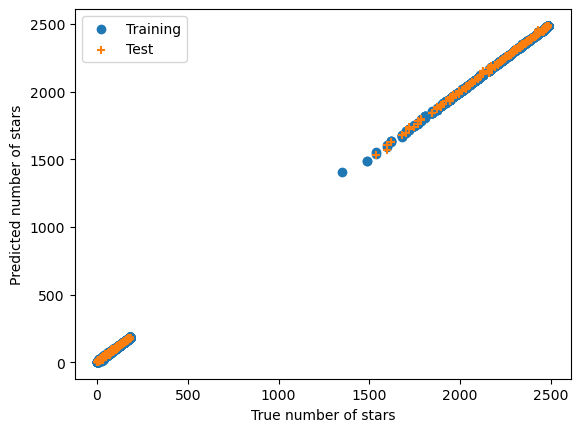

In [30]:
import matplotlib.pyplot as plt 
plt.scatter(y_train, y_pred_train, label='Training')
plt.scatter(y_test, y_pred, label='Test', marker="+")
plt.legend()
plt.xlabel('True number of stars')
plt.ylabel('Predicted number of stars')
plt.savefig('res.png', dpi=200)

In [34]:
importances = rf.feature_importances_
feature_names = ["time since creation", "prediction horizon", "current number of stars", "initial number of stars", "avg commits", "nb of contributors"]

feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)


plt.figure(figsize=(10,6))
feat_importances.plot(kind='bar')
plt.title("Feature Importances from Random Forest")
plt.ylabel("Importance")
plt.show()

ValueError: Length of values (7) does not match length of index (6)

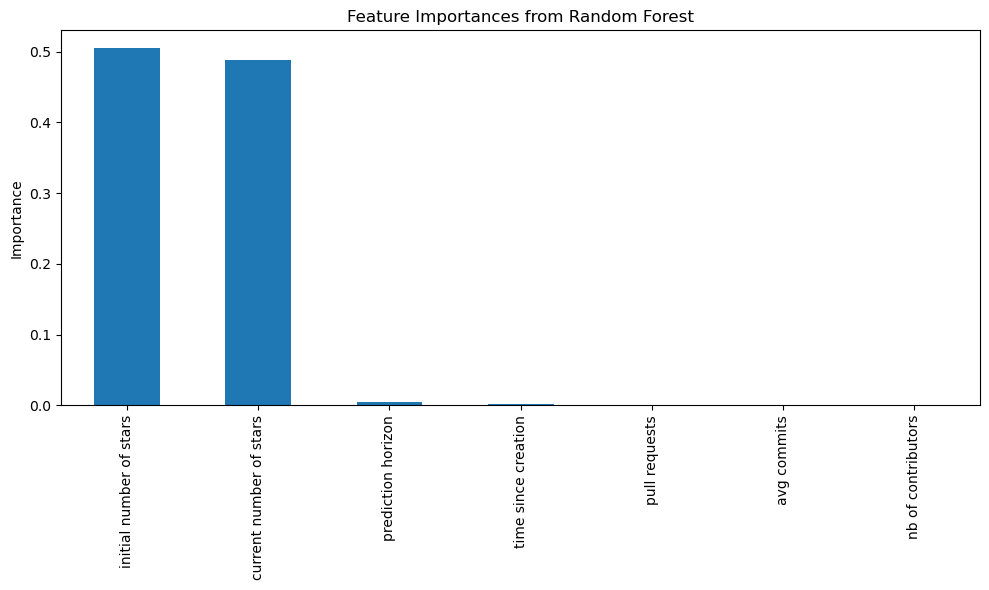

In [36]:
importances = rf.feature_importances_   # <-- FIXED
feature_names = [
    "time since creation",
    "prediction horizon",
    "current number of stars",
    "initial number of stars",
    "avg commits",
    "nb of contributors",
    "pull requests"
]

feat_importances = (
    pd.Series(importances, index=feature_names)
      .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
feat_importances.plot(kind='bar')
plt.title("Feature Importances from Random Forest")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Choose threshold for “big” time horizons
threshold = 10   # <-- adjust to what makes sense for your data

# Boolean masks
big_train = time_horizon_train > threshold
big_test = time_horizon_test > threshold

plt.figure(figsize=(8,6))

# Regular training points
plt.scatter(
    y_train[~big_train],
    y_pred_train[~big_train],
    label='Training',
    alpha=0.6
)

# Large-marker training points
plt.scatter(
    y_train[big_train],
    y_pred_train[big_train],
    s=120,              # <-- bigger points
    edgecolors='black',
    label='Training (large horizon)'
)

# Regular test points
plt.scatter(
    y_test[~big_test],
    y_pred[~big_test],
    marker="+",
    label='Test'
)

# Large-marker test points
plt.scatter(
    y_test[big_test],
    y_pred[big_test],
    s=200,
    marker="o",
    facecolors='none',
    edgecolors='red',
    linewidths=2,
    label='Test (large horizon)'
)

plt.legend()
plt.xlabel('True number of stars')
plt.ylabel('Predicted number of stars')
plt.savefig('res.png', dpi=200)
plt.show()


In [83]:
!pip install aiohttp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 55.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [62]:
repo_info = get_repo_info(reponames[110])
df_stars = get_star_history(repo_info["id"])

df_stars

,repo_id,date,stargazers
0,51148283,2016-02-01,3
1,51148283,2016-04-01,5
2,51148283,2016-06-01,6
3,51148283,2016-07-01,8
4,51148283,2016-09-01,9
5,51148283,2016-10-01,10
6,51148283,2016-11-01,11
7,51148283,2017-01-01,13
8,51148283,2017-02-01,14
9,51148283,2017-03-01,15


In [63]:
repo_id = repo_info["id"]

In [66]:
url_pr_size = f"https://api.ossinsight.io/q/analyze-pull-requests-size-per-month?repoId={repo_id}"
res_size = requests.get(url_pr_size).json()
df_pr_size = pd.DataFrame(res_size['data'])
df_pr_size["date"] = pd.to_datetime(df_pr_size["event_month"])
df_pr_size

,all_size,event_month,l,m,s,xl,xs,xxl,date
0,1,2016-09-01,0,0,1,0,0,0,2016-09-01
1,1,2016-10-01,0,1,0,0,0,0,2016-10-01
2,1,2018-03-01,0,0,0,0,1,0,2018-03-01


In [70]:
df_stars.iloc[3]['date']

Timestamp('2016-07-01 00:00:00')

In [74]:
df_pr_size[['l', 'm', 's', 'xl', 'xs', 'xxl']].sum().sum()

np.int64(3)

In [71]:
df_pr_size["date"]

0   2016-09-01
1   2016-10-01
2   2018-03-01
Name: date, dtype: datetime64[ns]

## 0. Initialize Notebook Environment
We load the required Python libraries.  
If something is missing, uncomment the pip install commands.

We will use:
- `requests` to call the OSS Insight REST API  
- `pandas` to manipulate tabular data  
- `bokeh` for fully interactive plots (zoom, hover, pan) 

In [1]:
# !pip install requests pandas bokeh

import requests
import pandas as pd
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool

output_notebook()


Loading BokehJS ...

Explanation: The OSS Insight API base URL is `https://api.ossinsight.io/v1`. The API provides various endpoints for repository data
ossinsight.io. We will construct requests to these endpoints for our target repository. Bokeh’s `output_notebook()` is called to enable interactive plot display within the notebook.

# 1. Select Repository  
This is the only value you need to change if you want to analyze another GitHub project.

The format must be:  
`owner = "ORG_OR_USER"`  
`repo  = "REPOSITORY_NAME"`  


In [2]:
owner = "deeplabcut"
repo  = "deeplabcut"

def get_repo_info(owner, repo):
    url = f"https://api.ossinsight.io/gh/repo/{owner}/{repo}"
    res = requests.get(url)
    res.raise_for_status()
    return res.json()["data"]

repo_info = get_repo_info(owner, repo)
repo_id = repo_info["id"]

print("Repo:", repo_info["full_name"])
print("Repo ID:", repo_id)
print("Stars (live GitHub count):", repo_info["stargazers_count"])

Repo: DeepLabCut/DeepLabCut
Repo ID: 126897385
Stars (live GitHub count): 5366


# 2. STAR HISTORY  
### CHAOSS Relation  
Although stars are *not* an official CHAOSS metric, they are widely used as a **signal of growth and adoption**, which falls under the CHAOSS *Growth-Maturity-Decline* model.

### Why it matters  
- Shows overall interest in the project  
- Detects periods of major attention (papers, releases, conferences, viral posts)  
- Indicates growth trajectories (accelerating, stagnant, declining)

### OSS Insight Endpoint  
`/stargazers/history?period=month`  
This gives a **monthly timeline** of cumulative stars.


In [3]:
def get_star_history(repo_id: int) -> pd.DataFrame:
    url = f"https://api.ossinsight.io/q/analyze-stars-history?repoId={repo_id}"
    res = requests.get(url)
    res.raise_for_status()
    data = res.json()["data"]
    df = pd.DataFrame(data)
    if df.empty:
        return df
    
    df["event_month"] = pd.to_datetime(df["event_month"])
    df = df.rename(columns={"event_month": "date", "total": "stargazers"})
    return df

df_stars = get_star_history(repo_id)

if df_stars.empty:
    print("No star history data returned by OSS Insight for this repository.")
else:
    display(df_stars.tail())

,date,repo_id,stargazers
87,2025-07-01,126897385,5086
88,2025-08-01,126897385,5127
89,2025-09-01,126897385,5152
90,2025-10-01,126897385,5172
91,2025-11-01,126897385,5192


## Plot: Star Growth Curve  
Interpreting this chart:

- A steady positive slope → healthy long-term interest  
- Sharp jumps → major announcements/releases  
- Plateaus → stagnation or reduced visibility  
- Drops → stars removed (rare but possible)

Bokeh allows:
- scroll to zoom  
- click-drag to pan  
- hover to see exact values  


In [4]:
if df_stars.empty:
    print("No star history data returned for this repository.")
else:
    p = figure(
        title=f"Stargazers Over Time – {owner}/{repo}",
        x_axis_type='datetime',
        width=900, height=420,
        tools="pan,wheel_zoom,box_zoom,reset"
    )

    p.line(df_stars['date'], df_stars['stargazers'], line_width=2)
    p.circle(df_stars['date'], df_stars['stargazers'], size=3)

    p.add_tools(HoverTool(
        tooltips=[("Date", "@x{%F}"), ("Stars", "@y")],
        formatters={"@x": "datetime"}
    ))

    p.xaxis.axis_label = "Date"
    p.yaxis.axis_label = "Cumulative Stars"
    show(p)

# 3. COMMIT ACTIVITY (Time Distribution)

## CHAOSS Mapping
**Code Development - Commit Activity**

Understanding *when* developers contribute helps in:
- Identifying global contributor timezones
- Detecting "crunch times" or unhealthy work hours (e.g., weekends/late nights)
- Planning meetings and support hours

### OSS Insight Endpoint
`/q/analyze-commits-time-distribution?period=last_1_year`
This provides a heatmap of commit pushes by **Day of Week** and **Hour of Day**.

In [5]:
url_commits = f"https://api.ossinsight.io/q/analyze-commits-time-distribution?repoId={repo_id}&period=last_1_year"
res_commits = requests.get(url_commits).json()
df_commits = pd.DataFrame(res_commits['data'])

if not df_commits.empty:
    days = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
    df_commits["day_name"] = df_commits["dayofweek"].apply(lambda x: days[x])
    df_commits["hour_str"] = df_commits["hour"].astype(str)
    display(df_commits.head())

,dayofweek,hour,pushes,day_name,hour_str
0,0,6,3,Sun,6
1,0,7,2,Sun,7
2,0,8,2,Sun,8
3,0,9,1,Sun,9
4,0,10,5,Sun,10


In [6]:
from bokeh.models import LinearColorMapper, BasicTicker, ColorBar
from bokeh.transform import transform

if df_commits.empty:
    print("No commit data found.")
else:
    days = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
    hours = [str(x) for x in range(24)]
    
    mapper = LinearColorMapper(palette="Viridis256", low=df_commits.pushes.min(), high=df_commits.pushes.max())

    p_commits = figure(title=f"Commit Time Distribution (Last 1 Year)",
               x_range=hours, y_range=list(reversed(days)),
               x_axis_location="above", width=900, height=400,
               tools="hover,save,pan,box_zoom,reset,wheel_zoom")

    p_commits.rect(x="hour_str", y="day_name", width=1, height=1, source=df_commits,
            fill_color=transform('pushes', mapper), line_color=None)

    p_commits.add_tools(HoverTool(
        tooltips=[
            ('Day', '@day_name'),
            ('Hour', '@hour'),
            ('Pushes', '@pushes'),
        ]
    ))
    
    color_bar = ColorBar(color_mapper=mapper, location=(0, 0),
                         ticker=BasicTicker(desired_num_ticks=len(days)))

    p_commits.add_layout(color_bar, 'right')
    p_commits.axis.axis_line_color = None
    p_commits.axis.major_tick_line_color = None
    p_commits.axis.major_label_text_font_size = "10pt"
    p_commits.axis.major_label_standoff = 0
    p_commits.xaxis.major_label_orientation = 0
    
    show(p_commits)

# 4. PULL REQUEST HEALTH

## CHAOSS Mapping
**Code Development - Code Review Efficiency**

Analyzing PRs gives insight into the *velocity* and *quality* of the development process.

### Metrics
1.  **PR Overview**: High-level volume stats.
2.  **PR Size**: Smaller PRs are easier to review and merge (Good practice).
3.  **Time to Merge**: How long does a contributor wait? Long wait times discourage contribution.

### OSS Insight Endpoints
- `/q/analyze-repo-pr-overview`
- `/q/analyze-pull-requests-size-per-month`
- `/q/analyze-pull-request-open-to-merged`

In [7]:
# 4.1 PR Overview
url_pr_overview = f"https://api.ossinsight.io/q/analyze-repo-pr-overview?repoId={repo_id}"
res_overview = requests.get(url_pr_overview).json()
data_overview = res_overview['data'][0] if res_overview['data'] else {}

if data_overview:
    print(f"Total PRs:       {data_overview.get('pull_requests')}")
    print(f"PR Creators:     {data_overview.get('pull_request_creators')}")
    print(f"Total Reviews:   {data_overview.get('pull_request_reviews')}")
    print(f"Reviewers:       {data_overview.get('pull_request_reviewers')}")
else:
    print("No PR overview data found.")

Total PRs:       985
PR Creators:     162
Total Reviews:   1139
Reviewers:       27


In [8]:
# 4.2 PR Size History
url_pr_size = f"https://api.ossinsight.io/q/analyze-pull-requests-size-per-month?repoId={repo_id}"
res_size = requests.get(url_pr_size).json()
df_pr_size = pd.DataFrame(res_size['data'])

if not df_pr_size.empty:
    df_pr_size["date"] = pd.to_datetime(df_pr_size["event_month"])
    
    sizes = ['xs', 's', 'm', 'l', 'xl', 'xxl']
    colors = ["#e8f5e9", "#c8e6c9", "#a5d6a7", "#81c784", "#66bb6a", "#4caf50"] 
    
    p_size = figure(title="PR Size Distribution Over Time",
                x_axis_type="datetime", width=900, height=400,
                tools="pan,wheel_zoom,box_zoom,reset")
    
    p_size.vbar_stack(sizes, x='date', width=20 * 24 * 3600 * 1000, source=df_pr_size,
                  color=colors, legend_label=sizes)
    
    p_size.legend.location = "top_left"
    p_size.legend.orientation = "horizontal"
    p_size.yaxis.axis_label = "Number of PRs"
    
    show(p_size)

In [9]:
# 4.3 Time to Merge
url_merge = f"https://api.ossinsight.io/q/analyze-pull-request-open-to-merged?repoId={repo_id}"
res_merge = requests.get(url_merge).json()
df_merge = pd.DataFrame(res_merge['data'])

if not df_merge.empty:
    df_merge["date"] = pd.to_datetime(df_merge["event_month"])
    
    p_merge = figure(title="Median PR Merge Time (Hours)",
                x_axis_type="datetime", width=900, height=400,
                tools="pan,wheel_zoom,box_zoom,reset")
    
    p_merge.line(df_merge['date'], df_merge['p50'], line_width=2, color="navy", legend_label="Median Merge Time")
    p_merge.circle(df_merge['date'], df_merge['p50'], size=4, color="navy")
    
    p_merge.add_tools(HoverTool(
        tooltips=[("Date", "@x{%F}"), ("Median Hours", "@y{0.0}")],
        formatters={"@x": "datetime"}
    ))
    
    p_merge.yaxis.axis_label = "Hours to Merge"
    
    show(p_merge)

# 5. ISSUE HEALTH

## CHAOSS Mapping
**Issue Resolution & Responsiveness**

Issues are the primary channel for user feedback and bug reports.
- **Response Time**: How fast does the community acknowledge a problem?
- **Resolution Rate**: Are issues being closed, or are they piling up?

### OSS Insight Endpoints
- `/q/analyze-repo-issue-overview`
- `/q/analyze-issue-open-to-first-responded`
- `/q/analyze-issue-opened-and-closed`

In [10]:
# 5.0 Issue Overview
url_issue_overview = f"https://api.ossinsight.io/q/analyze-repo-issue-overview?repoId={repo_id}"
res_issue_overview = requests.get(url_issue_overview).json()
data_issue_overview = res_issue_overview['data'][0] if res_issue_overview['data'] else {}

if data_issue_overview:
    print(f"Total Issues:       {data_issue_overview.get('issues')}")
    print(f"Issue Creators:     {data_issue_overview.get('issue_creators')}")
    print(f"Total Comments:     {data_issue_overview.get('issue_comments')}")
    print(f"Commenters:         {data_issue_overview.get('issue_commenters')}")
else:
    print("No Issue overview data found.")

Total Issues:       1951
Issue Creators:     1122
Total Comments:     9832
Commenters:         1287


In [11]:
# 5.1 Issue Response Time
url_issue_resp = f"https://api.ossinsight.io/q/analyze-issue-open-to-first-responded?repoId={repo_id}"
res_resp = requests.get(url_issue_resp).json()
df_issue_resp = pd.DataFrame(res_resp['data'])

if not df_issue_resp.empty:
    df_issue_resp["date"] = pd.to_datetime(df_issue_resp["event_month"])
    
    p_resp = figure(title="Median Issue Response Time (Hours)",
                x_axis_type="datetime", width=900, height=400,
                tools="pan,wheel_zoom,box_zoom,reset")
    
    p_resp.line(df_issue_resp['date'], df_issue_resp['p50'], line_width=2, color="firebrick", legend_label="Median Response Time")
    p_resp.circle(df_issue_resp['date'], df_issue_resp['p50'], size=4, color="firebrick")
    
    p_resp.add_tools(HoverTool(
        tooltips=[("Date", "@x{%F}"), ("Median Hours", "@y{0.0}")],
        formatters={"@x": "datetime"}
    ))
    
    p_resp.yaxis.axis_label = "Hours to First Response"
    
    show(p_resp)

In [12]:
# 5.2 Issues Opened vs Closed
url_issue_oc = f"https://api.ossinsight.io/q/analyze-issue-opened-and-closed?repoId={repo_id}"
res_oc = requests.get(url_issue_oc).json()
df_issue_oc = pd.DataFrame(res_oc['data'])

if not df_issue_oc.empty:
    df_issue_oc["date"] = pd.to_datetime(df_issue_oc["event_month"])
    
    p_oc = figure(title="Issues Opened vs Closed",
                x_axis_type="datetime", width=900, height=400,
                tools="pan,wheel_zoom,box_zoom,reset")
    
    p_oc.line(df_issue_oc['date'], df_issue_oc['opened'], line_width=2, color="green", legend_label="Opened")
    p_oc.line(df_issue_oc['date'], df_issue_oc['closed'], line_width=2, color="red", legend_label="Closed")
    
    p_oc.legend.location = "top_left"
    p_oc.yaxis.axis_label = "Count"
    
    show(p_oc)

# 6. RECENT TRENDING CONTRIBUTORS (Last 28 Days)

## CHAOSS Mapping  
- **Contribution Distribution**  
- **Bus Factor / Elephant Factor**  
- **Maintainer Overload Detection**  

It’s useful to see who the top contributors are and how contributions are distributed among individuals. If one or two people contribute the majority of code, the project might have a sustainability risk.

**Note:** This section shows **recent trending contributors** based on activity in the **last 28 days** compared to the previous period. It highlights currently active members rather than all-time top contributors.

### OSS Insight Endpoint  
`/q/analyze-people-code-pr-contribution-rank`
Lists recent trending contributors based on PR activity (last month vs previous month).

In [13]:
url_list = f"https://api.ossinsight.io/q/analyze-people-code-pr-contribution-rank?repoId={repo_id}&excludeBots=true"
res_list = requests.get(url_list).json()

df_top = pd.DataFrame(res_list['data'])
# Columns: actor_login, changes, is_new_contributor, last_month_events, last_2nd_month_events, proportion, row_num

if not df_top.empty:
    print("Top Trending Contributors (Last 28 Days):")
    display(df_top[['row_num', 'actor_login', 'last_month_events', 'proportion']].head(10))
else:
    print("No trending contributor data found.")

Top Trending Contributors (Last 28 Days):


,row_num,actor_login,last_month_events,proportion
0,1,maximpavliv,1,0.5
1,2,AlexEMG,1,0.5


# 7. RECENT TRENDING ISSUE PARTICIPANTS (Last 28 Days)

## CHAOSS Mapping  
- **Issue Participants**  
- **Community Engagement**  
- **User Base Growth**  

Not all contributions are code – a thriving community also involves users who file bug reports or feature requests. The number of issue creators reflects community engagement from users and stakeholders of the project.

**Note:** This section shows **recent trending issue participants** (commenters) based on activity in the **last 28 days**.

### OSS Insight Endpoint  
`/q/analyze-people-issue-comment-contribution-rank`
Lists recent trending issue participants (commenters) based on activity.

In [14]:
url_ic = f"https://api.ossinsight.io/q/analyze-people-issue-comment-contribution-rank?repoId={repo_id}&excludeBots=true"
res_ic = requests.get(url_ic).json()

df_ic = pd.DataFrame(res_ic['data'])
# Columns: actor_login, changes, is_new_contributor, last_month_events, last_2nd_month_events, proportion, row_num

if not df_ic.empty:
    print("Top Trending Issue Participants (Last 28 Days):")
    display(df_ic[['row_num', 'actor_login', 'last_month_events', 'proportion']].head(10))
else:
    print("No trending issue participant data found.")

Top Trending Issue Participants (Last 28 Days):


,row_num,actor_login,last_month_events,proportion
0,1,maximpavliv,6,0.3750
1,2,AlexEMG,3,0.1875
2,3,tsievert,3,0.1875
3,4,arashsm79,2,0.1250
4,5,MMathisLab,1,0.0625
5,6,endvntgf-design,1,0.0625


# 8. CONTRIBUTOR GEOGRAPHY

## CHAOSS Mapping  
**Diversity & Inclusion – Geographic Diversity**

Diversity in geographic location is an important aspect of an inclusive open source community. A globally distributed contributor base suggests:
- higher inclusivity  
- resilience across time zones  
- broader adoption  

If all or most contributors hail from one region, the project might be missing perspectives from other parts of the world.

### OSS Insight Endpoint  
`/q/analyze-pull-request-creators-map`
Returns the count of PR creators by country. Note: This data relies on what users list in their GitHub profiles.

In [15]:
def get_geo_distribution(repo_id: int, metric_type: str = "pr_creators") -> pd.DataFrame:
    endpoints = {
        "pr_creators": f"https://api.ossinsight.io/q/analyze-pull-request-creators-map?repoId={repo_id}",
        "stargazers": f"https://api.ossinsight.io/q/analyze-stars-map?repoId={repo_id}&period=all_times",
        "issue_creators": f"https://api.ossinsight.io/q/analyze-issue-creators-map?repoId={repo_id}"
    }
    url = endpoints.get(metric_type)
    if not url: return pd.DataFrame()
    
    res = requests.get(url).json()
    return pd.DataFrame(res['data'])

df_geo = get_geo_distribution(repo_id, "pr_creators")
if not df_geo.empty:
    display(df_geo.head())

,count,country_or_area,percentage
0,24,US,0.3288
1,13,CH,0.1781
2,6,DE,0.0822
3,5,CA,0.0685
4,4,JP,0.0548


## Plot: Top 5 Contributor Countries


In [16]:
if not df_geo.empty:
    top10 = df_geo.head(10)
    countries = top10['country_or_area'].astype(str).tolist()
    counts = top10['count'].tolist()

    p_geo = figure(title="Top 10 Contributor Countries (PR Creators)",
                 x_range=countries, width=800, height=400,
                 tools="hover,pan,wheel_zoom,box_zoom,reset")

    p_geo.vbar(x=countries, top=counts, width=0.6, color="teal")

    p_geo.xaxis.axis_label = "Country"
    p_geo.yaxis.axis_label = "Number of Contributors"
    p_geo.y_range.start = 0

    p_geo.add_tools(HoverTool(tooltips=[("Country", "@x"), ("Contributors", "@top")]))

    show(p_geo)

# 9. ORGANIZATIONAL AFFILIATION OF CONTRIBUTORS

## CHAOSS Mapping
- **Organizational Diversity**
- **Elephant Factor** (organization-level)
- **Corporate Governance Risk**

Another important metric is the distribution of contributions across organizations or employers. If one company employs the majority of contributors, the project might have an “Elephant Factor” risk – meaning the project heavily depends on one organization. On the other hand, participation from many organizations indicates healthy organizational diversity.

A project maintained by a single company can be healthy but might be less community-driven. A project with contributors from numerous organizations is more likely to have balanced governance and resilience if individuals leave.

### OSS Insight Endpoints
- `/q/analyze-pull-request-creators-company`
- `/q/analyze-issue-creators-company`
Returns organizations of PR creators and Issue creators. This data comes from GitHub user profiles.

In [17]:
# 10.1 PR Creators Company
print("--- PR Creators by Company ---")
url_org_pr = f"https://api.ossinsight.io/q/analyze-pull-request-creators-company?repoId={repo_id}"
res_org_pr = requests.get(url_org_pr).json()
df_org_pr = pd.DataFrame(res_org_pr['data'])
if not df_org_pr.empty:
    display(df_org_pr.head(10))

# 10.2 Issue Creators Company
print("\n--- Issue Creators by Company ---")
url_org_issue = f"https://api.ossinsight.io/q/analyze-issue-creators-company?repoId={repo_id}"
res_org_issue = requests.get(url_org_issue).json()
df_org_issue = pd.DataFrame(res_org_issue['data'])
if not df_org_issue.empty:
    display(df_org_issue.head(10))

--- PR Creators by Company ---


,code_contributors,company_name,proportion
0,5,EPFL,0.0309
1,2,AdaptiveMotorControlLab,0.0123
2,2,Enthought,0.0123
3,1,Nencki Institute of Experimental Biology PAS,0.0062
4,1,NIH Bioinformatics Scientist,0.0062
5,1,Donders Institute,0.0062
6,1,Friedrich Miescher Institute for Biomedical Re...,0.0062
7,1,Instituto de Neurociencias,0.0062
8,1,Swiss Federal Institute of Technology,0.0062
9,1,Champalimaud Research,0.0062



--- Issue Creators by Company ---


,company_name,issue_creators,proportion
0,EPFL,4,0.0036
1,kavlintnu,3,0.0027
2,Zhejiang University,2,0.0018
3,University of Washington,2,0.0018
4,University of Copenhagen,2,0.0018
5,University of Pennsylvania,2,0.0018
6,CatalystNeuro,2,0.0018
7,University of Stirling,2,0.0018
8,Stanford University,2,0.0018
9,Leibniz Institute for Neurobiology,2,0.0018


# 10. Conclusions and Insights

This notebook provides a full CHAOSS-style analysis using **only OSS Insight data**, without GitHub API quotas or tokens.

### You have seen metrics for:
- Project attention (Stars)
- Code contributor community
- New contributor momentum
- User engagement (Issue creators)
- Geographic diversity
- Organizational ecosystem
- Contributor concentration (risk analysis)

### This forms the foundation for:
- Open source health dashboards  
- Research reports  
- FAIR software sustainability assessments  
- Governance analysis  
- Community management frameworks  

You may now:
- change the repository  
- extend the notebook  
- add GitHub API metrics (review time, commit frequency)  
- combine with GrimoireLab or Augur